In [1]:
import pandas as pd

data = pd.read_csv("data/steam_reviews.csv")

# RQ3 

## What is the most common time the authors review an application?

In [40]:
from datetime import datetime as dt    #useful to work with timestamp
from matplotlib import pyplot as plt   #useful to plot result
from collections import Counter        #useful to count occurances

#convert all timestamp datas in dates and get only time
timestamp = [x for x in data.timestamp_created if not pd.isnull(x)]
t = [dt.fromtimestamp(x).time() for x in timestamp]
#count occurances
most_common_time = Counter(t).most_common(1)[0]

print("\nThe most common time of reviews is:", most_common_time[0],"with", most_common_time[1], "occurances.\n")


The most common time of reviews is: 16:54:53 with 586 occurances.



In [41]:
def reviewPerIntervals(interval): #plot the number of reviews for each of the intervals in times
    #get hour from our time_datas
    h = [x.hour for x in t]
    #create the intervals of time
    trange = [dt.strptime(x[:][0],"%H:%M:%S").hour for x in intervals]
    #add the las interval of time manually otherwise we miss to count the review between 20-24
    trange.append(24)
    trange = sorted(trange)
    #create the bin to count and plot the occurances in each interval
    count = pd.cut(h, trange)
    #plot the result
    count.value_counts().plot(kind='bar',rot = 0, color = "b" )
    plt.xlabel('Time intervals')
    plt.ylabel('Number of reviews')


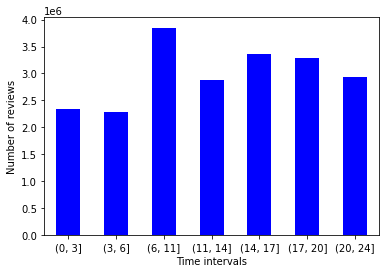

In [42]:
#plot the number of reviews in each given interval
intervals = [["06:00:00","10:59:59"],
             ["11:00:00","13:59:59"],
             ["14:00:00","16:59:59"],
             ["17:00:00","19:59:59"],
             ["20:00:00","23:59:59"],
             ["00:00:00","02:59:59"],
             ["03:00:00","05:59:59"]]

reviewPerIntervals(intervals)

# RQ4

## What are the top 3 languages used to review applications?

In [43]:
languages = data.language
#get the 3 most used languages
most_common_len = Counter(languages).most_common(3)

print("\nThe most common languages used to review applications are:\n",
     "-",most_common_len[0][0],"with", most_common_len[0][1], "occurances\n",
     "-",most_common_len[1][0],"with", most_common_len[1][1], "occurances\n",
     "-",most_common_len[2][0],"with", most_common_len[2][1], "occurances\n",)


The most common languages used to review applications are:
 - english with 9635437 occurances
 - schinese with 3764967 occurances
 - russian with 2348900 occurances



In [44]:
def languageFilter(data, languages):
    return data[data.language.isin(languages)]

## How many of them were voted as funny?

In [45]:
top3 = [most_common_len[0][0],most_common_len[1][0],most_common_len[2][0]]

#filtering data in order to get reviews in specific languages
top3df = languageFilter(data, top3)
#get the percentage of funny reviews
perc_f = len(top3df[top3df.votes_funny > 0])/len(top3df)

print("\nThe", round(perc_f*100,2),"% of the reviews were voted as funny.")


The 12.21 % of the reviews were voted as funny.


## How many of them were voted as helpful?

In [46]:
#get the percentage of helpful reviews
perc_h = len(top3df[top3df.votes_helpful > 0])/len(top3df)

print("\nThe", round(perc_h*100,2),"% of the reviews were voted as helpful.")


The 29.16 % of the reviews were voted as helpful.


# RQ7

## What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

To calculate the probability that a review has a weighted vote score greater than or equal to 0.5, we will use the classic definition of probability, favorable cases over possible cases.

In [47]:
prob = len(data[data.weighted_vote_score >= 0.5]) / len(data.weighted_vote_score)
print("\nThe probability is equal to:", round(prob,3))


The probability is equal to: 0.22


## What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

To calculate the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5, we will use the definition of Conditional probability:

$$\mathbb{P}(A|B)=\frac{\mathbb{P}(A\cap B)}{\mathbb{P}(B)}$$

$A$ = "the review has at least one vote as funny" 


$B$ = "the Weighted Vote Score is bigger than 0.5"

In [48]:
pB = len(data[data.weighted_vote_score > 0.5]) / len(data.weighted_vote_score)
B = data[data.weighted_vote_score > 0.5]
pAB = len(B[B.votes_funny > 0]) / len(data)

print("\nThe probability is equal to:", round(pAB/pB,3))


The probability is equal to: 0.25


## Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

To say if the two probabilities are independent we will use the definition:

$$\mathbb{P}(A\cap B)=\mathbb{P}(A)\mathbb{P}(B)$$

So if this definition is true we can say that the event “a review has at least one vote as funny” and the event “a review has a Weighted Vote Score equal or bigger than 0.5” are indipendent, otherwise they are dipendent.

In [49]:
pA = len(data[data.votes_funny > 0]) / len(data.weighted_vote_score)

if pA*pB == pAB:
    print("\nThe events are indipendent!")
else:
    print("\nThe events are dipendent!")


The events are dipendent!


# RQ8


## Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian?

In [2]:
import matplotlib.pyplot as plt
import scipy 
import numpy as np

#filtering the dataset
Russia = data[data['language']=='russian'].weighted_vote_score
China = data[data['language']=='schinese'].weighted_vote_score

#let's have a first look at mean and variance
print("\nThe Russian mean is :",round(np.mean(Russia),3))
print("The Chinese mean is :",round(np.mean(China),3))
print("\nThe Russian variance is :",round(np.var(Russia),3))
print("The Chinese variance is :",round(np.var(China),3))


The Russian mean is : 0.214
The Chinese mean is : 0.146

The Russian variance is : 0.066
The Chinese variance is : 0.057


Now that we’ve taken a first look at the mean and the variance of the two populations, we can run a t-test to determine if the two sets are significantly different from each other.

In [81]:
#t-test
ttest = scipy.stats.ttest_ind(Russia, China, equal_var=False)
print("\nThe p-valuee of the t-test is:",ttest.pvalue)


The p-valuee of the t-test is: 0.0


As you might expect the p-value of the t-test is very low so the difference in the group is remarkable so the two populations are different.

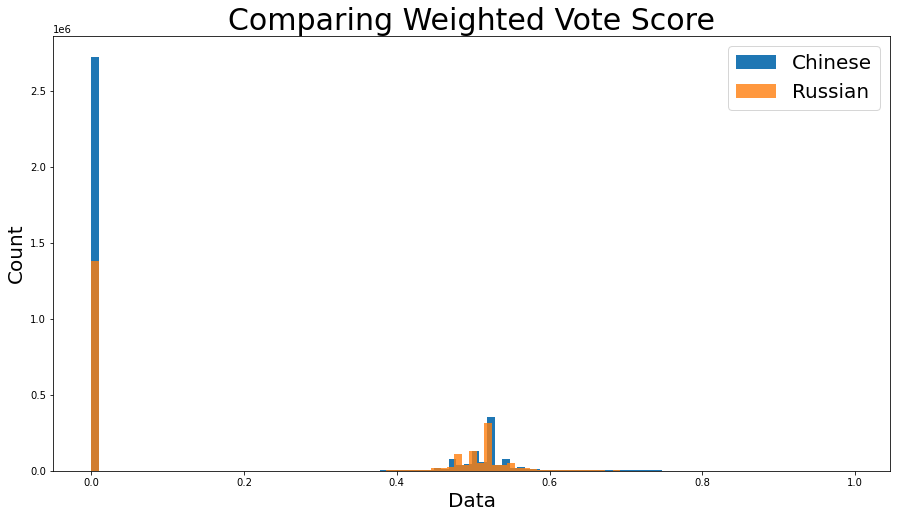

In [9]:
#a look of the distribution of the votes for each istance
plt.figure(figsize=(15,8))
plt.hist(China, bins=100, alpha=1, label="Chinese")
plt.hist(Russia, bins=100, alpha=0.8, label="Russian")

plt.xlabel("Data", size=20)
plt.ylabel("Count", size=20)
plt.title("Comparing Weighted Vote Score", size=30)
plt.legend(loc='upper right',fontsize = 20)
plt.show()

## What are histograms, bar plots, scatterplots and pie charts used for?

Histograms, bar plots, scatterplots and pie charts are tools that are used to explore the dataset and visualize some information about it. In particular:

* **Bar graphs**: are used to display the relationship between a numeric and a categorical variable, its heights or length represent the frequencies of each category. Often we use multiple bar plots to compare different datasets on the same categories;
* **Histograms**: if the groups depicted in a bar graph are actually continuous numeric ranges, we can push the bars together to generate a histogram. As in bar graphs, the bar lengths in histograms typically correspond to counts of data points, and their patterns demonstrate the distribution of variables in your data;
* **Scatterplot**: are used to determine relationships between the two different things. The x-axis is used to measure one event (or variable) and the y-axis is used to measure the other. If both variables increase at the same time, they have a positive relationship. If one variable decreases while the other increases, they have a negative relationship. Sometimes the variables don't follow any pattern and have no relationship;
* **Pie charts**: are best to use when you are trying to compare parts of a whole and you want to highlight the relationship among them.


## What insights can you extract from a Box Plot?


A boxplot is a type of graph used to display patterns of quantitative data. The boxplot splits the data set into quartiles. The body of the boxplot consists of a "box", which goes from the first quartile to the third quartile.

Within the box, an orizzontal line is drawn at the Q2, the median of the data set. Two vertical lines, called whiskers, extend from the bottom and top of the box. The bottom whisker goes from Q1 to the smallest non-outlier in the data set, and the top whisker goes from Q3 to the largest non-outlier.

In the end from a box plot we can extract:
* **min** and **max** value of the data
* **median** of the data
* the **first** and the **third quartile**

# TQ2

## How much running time does it take to execute splitSwap(a, 0, n)?

Given the following recursive function splitSwap, which accepts an array a, an index i, and a length n, let's analyze its computational cost:

>  function splitSwap(a, l, n):\
>   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;if n <= 1:\
>   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;return\
>   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;splitSwap(a, l, n/2)\
>   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;splitSwap(a, l+ n /2, n/2)\
>   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;swapList(a, l, n)
    

Before analyzing the computational cost of splitSwap, let’s focus on swapList’s:
>function swapList(a, l, n):\
>  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;for i = 0 to n/2:\
>    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;tmp = a[l + i]\
>    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a[l + i] = a[l + n/2 + i]\
>    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a[l + n/2 + i] = tmp


* line 1: there is a *for* istance which cost is proportional to the number of iteration,that is, $\theta\big(\frac{n}{2}\big) \approx \theta(n)$
* lines 2-4: there are all constant operations

So the computational cost of swapList is $\theta(n)$.

At this point, since splitSwap is a recursive function, we can write the recurrence equation:

* $T(n)=2\,T\big(\frac{n}{2}\big)+\theta(n)$
* $T(1)=\theta(1)$

Now recalling the master theorem for divide-and-conquer recurrences:
> *Given a recurrence relation $T(n)$ of the form: $$ T(n)=aT\left({\frac {n}{b}}\right)+f(n)$$
>Then the $T(n)$ function is asymptotically limited according to one of the following three cases:* 
>1. if there is a constant $\varepsilon >0$ such that $f(n)=O\left(n^{\log _{b}a-\varepsilon }\right)$ then $T(n)=\theta \left(n^{\log _{b}a}\right)$; 
>2. if $f(n)=\theta \left(n^{\log _{b}a}\right)$ then $T(n)=\theta \left(n^{\log _{b}a}\log n\right)$;
>3. if there is a constant $\varepsilon >0$ such that $f(n)=\Omega \left(n^{\log _{b}a+\varepsilon }\right)$  and exist a constant $0<c<1$ and an integer $n_{0}$ such that $\forall n\geq n_{0}\colon af\left({\frac {n}{b}}\right)\leq cf(n)$, then $T(n)=\theta (f(n))$.

we can state that the computational cost of splitSwap's algorithm is $\theta(n\log(n))$, as we fall into case 2 with $a=2$ and $b=2$.

## What does this algorithm do? Is it optimal?

In order to understand what the splitSwap's algorithm does, let's start analyzing the behaviour of swapList.

Assuming that $0\leq l+ n \leq len(a)$, when we call $\,\texttt{swapList(a,l,n)}\,$ we are fixing the first $l$ items of the array $a$ and do a permutation with the next $n$'s. In particular we are taking the next $n$ elements, divide them in two subgroups of length $\big\lfloor{\frac{n}{2}}\big\rfloor$ and switch them.


For exemple, given:
* $a = [13,12,3,45,25,6,71,82,99,10]$
* $l = 4$
* $n = 5$

if we want to simulate $\,\texttt{swapList(a,4,5)}\,\,$,we fix the elements $\,\,[13,12,3,45]\,\,$, select the next 5 $\,\,[71,82,25,6,99]\,\,$, divide them in two subgroup of length $\big\lfloor{\frac{5}{2}}\big\rfloor = 2$, $\,\,[71,82] \,\, [25,6] \,\,$ and we switch them. So the result is:

$$a = [13,12,3,45,71,82,25,6,99,10]$$

Now that we’ve figured out what the swapList algorithm does, let’s focus on the previous one. When we call $\,\texttt{splitSwap(a,l,n)}\,$ we are fixing the first $l$ items of the array $a$ and apply recursively the swapList's algorithm to the next $n$ elements. Since we are doing it recursively we are halving each time the array as long as the length of the subarray is greather than 1. At this moment there is a callback of the previous functions and we apply at each subarray created by the callback stack, the swapList's algorithm. Then at the end we get an array with the first $l$ elements unchanged and the next $n$ reversed according to a specific law that depends on the fact if $n$ is even or odd.\
In particular if $n$ is a power of 2 the $n$ elements next to the first $l$'s are reversed according to original order.

For exemple, given:
* $a = [5,2,4,7,1,3,6,8]$
* $l = 3$
* $n = 4$

if we want to simulate $\,\texttt{splitSwap(a,3,4)}$ we can fallow the path show on the next figure:

![spliSwap](data/splitSwap.png)